In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import model
from tqdm import tqdm
from skimage import io,transform
from matplotlib import pyplot as plt

C:\Users\s110024\AppData\Local\conda\conda\envs\ML2018\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
INPUT_SIZE = [224, 224, 3]
N_CLASSES = 120

In [3]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [4]:
def test_eval(sess, x_data, train_phase):
    batch_size = 1
    n_sample = x_data.shape[0]
    n_batch = int((n_sample+batch_size-1) / batch_size)
    tmp_pred=[]
    log=[]
    for batch in range(n_batch):
        start = batch * batch_size
        end = min(n_sample, start + batch_size)
        tmp_logits = sess.run(logits, feed_dict={x: x_data[start:end], is_training: train_phase})
        tmp=softmax(np.squeeze(tmp_logits))
        tmp_pred.append(tmp)
    tmp_pred = np.array(tmp_pred)

    return tmp_pred

  0%|                                                                                        | 0/10357 [00:00<?, ?it/s]C:\Users\s110024\AppData\Local\conda\conda\envs\ML2018\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|████████████████████████████████████████████████████████████████████████████| 10357/10357 [03:32<00:00, 48.68it/s]


(10357, 224, 224, 3)


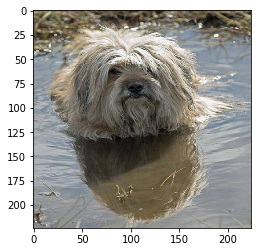

In [5]:
DATA = pd.read_csv('example.csv').as_matrix()
All_id = DATA[:, 0]

rawImg = []
test_data = []
dirs = os.getcwd()


for i in tqdm(range(0,len(All_id))):
    imgs_path = os.path.join(dirs, 'test', All_id[i]+'.jpg')
    img = io.imread(imgs_path)
    img = transform.resize(img, (224,224,3))
    test_data.append(img)

test_data = np.array(test_data)
plt.imshow(test_data[10])

print(test_data.shape)

In [ ]:
if __name__ == '__main__':

    x = tf.placeholder(dtype=tf.float32, shape=(None, INPUT_SIZE[0], INPUT_SIZE[1], INPUT_SIZE[2]), name='x')
    y = tf.placeholder(dtype=tf.float32, shape=(None, N_CLASSES), name='y')
    is_training = tf.placeholder(dtype=tf.bool, shape=(), name='train_phase')

    logits = model.VGG16(x=x, is_training=is_training, n_classes=N_CLASSES)


    init = tf.global_variables_initializer()
    
    restore_variable = [var for var in tf.global_variables() if var.name.startswith('')]
    
    train_history = []
    val_history = []
    
    saver = tf.train.Saver()
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.5
    with tf.Session(config=config) as sess:
        saver.restore(sess, r'H:\Users\sechang\model\model_26.ckpt')
        ans = test_eval(sess=sess, x_data=test_data, train_phase=False)
    
        

INFO:tensorflow:Restoring parameters from H:\Users\sechang\model\model_26.ckpt


In [ ]:
breed = pd.read_csv('breed.csv', header=None).as_matrix()
breed = np.reshape(breed, N_CLASSES)


I = pd.Index(All_id, "rows")
C = pd.Index(breed, "cols")

df = pd.DataFrame(data=ans, columns=C)
df.insert(0, 'id', I)

df.to_csv("submission.csv", index=False)
df